TO-DO

GRAFICAS DE LOS RESULTADOS GLOBALES Y DE LA BL (GRAFICA DE EL ENUNCIADO)



#IMPORTS

In [1]:
#REALIZAMOS LOS IMPORTS PERTINENTES PARA CARGAR LOS DATASET Y MODELOS
import pandas as pd
import numpy as np
import math
import random
import sys
from itertools import permutations
import time

#Cargamos nuestro dataset (entorno alojado)
from google.colab import drive
drive.mount('/content/drive/')

%cd drive/MyDrive/Universidad/BH/P1/

Mounted at /content/drive/
/content/drive/MyDrive/Universidad/BH/P1


# CARGAMOS Y VISUALIZAMOS LOS DATOS

In [2]:
#Descargamos los csv 


indices = './bicicletas/cercanas_indices.csv' 
kms = './bicicletas/cercanas_kms.csv' 
deltas = './bicicletas/deltas_5m.csv'

df_indices = pd.read_csv(indices)
df_kms = pd.read_csv(kms)
df_deltas = pd.read_csv(deltas)

df_deltas.iloc[1:] *= 2

In [3]:
print("***INDICES***")
df_indices = df_indices.to_numpy()
print(df_indices)
print(df_indices[5][2])

***INDICES***
[[ 0  7  4  6 10  8  1 12 15 11  5  2  9  3 14 13]
 [ 1 12  6 10  5  7  0 15  8 11  4  2  9  3 14 13]
 [ 2  9 11 15  3  5 12  8  6  1  7  0 10  4 14 13]
 [ 3  9  2 11  5 15 12  1  6  8 14  7 10 13  0  4]
 [ 4  0  7  8  6 10 15  1 12 11  5  2  9  3 14 13]
 [ 5 12  1 11  6 15  2  9  8 10  7  3  0  4 14 13]
 [ 6  1 12  7 10  0  8  5 15 11  4  2  9  3 14 13]
 [ 7  0 10  6  1  4  8 12 15  5 11  2  9  3 14 13]
 [ 8 15  6  0 11  7 12  4  1 10  5  2  9  3 14 13]
 [ 9  3  2 11  5 15 12  1  6  8  7 10  0  4 14 13]
 [10  7  6  1  0 12  4  8  5 15 11  2  9  3 14 13]
 [11 15  2  5 12  8  9  6  1  3  7  0 10  4 14 13]
 [12  5  1  6 15 11  7 10  8  0  2  9  4  3 14 13]
 [13 14  3  9  2  5 11 12 15  1  6  8 10  7  0  4]
 [14 13  3  9  2  5 11 12 15  1  6  8 10  7  0  4]
 [15 11  8 12  6  2  5  1  7  0  9 10  4  3 14 13]]
1


In [4]:
print("***KMS***")
df_kms = df_kms.to_numpy()
print(df_kms)

print(df_kms[1][1])

***KMS***
[[0.         0.46122758 0.71655698 0.93136219 0.9477276  1.06351864
  1.42129769 1.55876058 1.67533127 2.01893689 2.04341964 2.78876899
  3.20974316 3.83795985 7.17593159 7.58637037]
 [0.         0.5530186  0.59392116 0.8199783  0.92103396 1.00453464
  1.42129769 1.51124926 1.5791377  1.59078651 2.13485993 2.17315124
  2.31874603 2.92869393 6.03533468 6.45719995]
 [0.         0.66111819 0.7719908  1.14904395 1.16092089 1.34785215
  1.62399696 1.90642327 2.07576306 2.17315124 2.67622899 2.78876899
  2.84554235 3.2387435  4.58439543 4.96949473]
 [0.         0.63158184 1.16092089 1.88393315 2.00766735 2.27817668
  2.44357544 2.92869393 3.01707871 3.04182663 3.42512566 3.64814254
  3.7075951  3.81398897 3.83795985 4.35087455]
 [0.         0.71655698 1.16867873 1.34440671 1.61482766 1.61887735
  2.08973603 2.13485993 2.22053693 2.47429931 2.69072367 3.2387435
  3.73657019 4.35087455 7.74211391 8.14509473]
 [0.         0.48972237 0.92103396 1.00374731 1.12205292 1.16439317
  1.3478

La fila 1 de deltas es el numero inicial de bicicletas ocupadas en cada estación. La capacidad total de cada estación no la conocemos, debemos estudiarla nosotros.

Usaremos la primera fila del dataset deltas como un movimiento inicial que no cuenta kilómetros

Multiplicamos los movimientos de las bicicletas por 2

In [5]:
print("***MOVIMIENTOS***")
df_deltas


***MOVIMIENTOS***


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5,7,13,6,8,13,8,9,6,10,10,18,8,13,15,14
1,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2
474,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,0,-6,0,0,0,0


In [6]:
#Sumamos todas las columnas de movimientos de delta para estimar un numero maximo de slots por estacion
deltas_np  = df_deltas.to_numpy()

print(deltas_np.shape)
dictsum = {}
for column in range(deltas_np.shape[1]):
  suma = 0
  for i in range(deltas_np.shape[0] ):
    #print("Accediendo a la posicion fila",i," columna",column)
    suma += deltas_np[i][column]
  
  dictsum[column] = suma

print(dictsum)

(478, 16)
{0: 5, 1: 7, 2: 19, 3: 16, 4: 2, 5: 19, 6: 0, 7: 3, 8: -4, 9: 12, 10: 2, 11: 18, 12: 12, 13: 15, 14: 17, 15: 10}


# DEFINICION DE FUNCIONES

In [7]:
def quita_bicis(distancias,indices,deltas,estacion,cap_estaciones,dist_tot,num_estaciones):

#CASO QUITAR BICI

  #HAY BICIS, PERO NO SUFICIENTES PARA TODAS LAS QUE SE QUIEREN QUITAR
  if cap_estaciones[estacion] < abs(deltas[estacion]):
    sin_bici = abs(deltas[estacion]) - cap_estaciones[estacion]
    cap_estaciones[estacion] += deltas[estacion]
    
    if cap_estaciones[estacion] < 0:
      cap_estaciones[estacion] = 0

    #Si la estacion esta vacia y alguien quiere coger una bicicleta, tendrá que ir a la estacion más cercana andando (dist * 3)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if cap_estaciones[indice_cerc] == 0:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          dist_cerc = distancias[estacion][i] * 3 
          dist_tot += dist_cerc
          cap_estaciones[indice_cerc] -= 1
          break
  #AUN HAY BICIS SUFICIENTES PARA QUITAR
  else:
    cap_estaciones[estacion] += deltas[estacion]

  return dist_tot,cap_estaciones
  

In [8]:
def mete_bicis(distancias,indices,deltas,estacion,cap_estaciones,capmax_estaciones,dist_tot,num_estaciones):

  if capmax_estaciones[estacion] < cap_estaciones[estacion] + abs(deltas[estacion]):
    sin_bici = (abs(deltas[estacion]) + cap_estaciones[estacion] ) - capmax_estaciones[estacion]
    cap_estaciones[estacion] += deltas[estacion]
    
    if cap_estaciones[estacion] > capmax_estaciones[estacion]:
      cap_estaciones[estacion] = capmax_estaciones[estacion]

    #Si la estacion esta llena y alguien quiere dejar una bicicleta, tendrá que ir a la estacion más cercana en bici (dist)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if capmax_estaciones[indice_cerc] == cap_estaciones[indice_cerc]:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          dist_cerc = distancias[estacion][i] 
          dist_tot += dist_cerc
          cap_estaciones[indice_cerc] += 1
          break

  #AUN HAY BICIS SUFICIENTES PARA METER
  else:
    cap_estaciones[estacion] += deltas[estacion]

  
  return dist_tot,cap_estaciones

In [9]:
def primer_mov(indices,movimientos_ini,estacion,cap_estaciones,capmax_estaciones,num_estaciones):
  
  mov_ini = movimientos_ini.iloc[0,:].to_numpy()

  
  #Realizamos la resta o suma de bicicletas en las estaciones
  sin_bici = 0

    #HAY HUECOS, PERO NO SUFICIENTES PARA TODAS LAS BICIS QUE SE QUIEREN DEJAR (TENER EN CUENTA cap_estaciones)
  
  if capmax_estaciones[estacion] < cap_estaciones[estacion] + abs(mov_ini[estacion]):
    sin_bici = (abs(mov_ini[estacion]) + cap_estaciones[estacion] ) - capmax_estaciones[estacion]
    cap_estaciones[estacion] += mov_ini[estacion]
    
    if cap_estaciones[estacion] > capmax_estaciones[estacion]:
      cap_estaciones[estacion] = capmax_estaciones[estacion]

  #Si la estacion esta llena y alguien quiere dejar una bicicleta, tendrá que ir a la estacion más cercana en bici (dist)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if capmax_estaciones[indice_cerc] == cap_estaciones[indice_cerc]:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          cap_estaciones[indice_cerc] += 1
          break

  #AUN HAY BICIS SUFICIENTES PARA METER
  else:
    cap_estaciones[estacion] += mov_ini[estacion]

  return cap_estaciones

In [10]:
###Comprobar personas sin bici hace bien la cuenta

def func_evaluacion(solucion,indices,distancias,movimientos_ini):
  
  dist_tot = 0

  num_estaciones = list(range(1,16))

  capmax_estaciones = solucion

  cap_estaciones = [0] * 16

  #CREAMOS EL PRIMER MOVIMIENTO, QUE NO GASTA KMS
  for estacion in range(16):
    cap_estaciones = primer_mov(indices,movimientos_ini,estacion,cap_estaciones,capmax_estaciones,num_estaciones)


  #Pasamos el dataframe a numpy para trabajar de forma mas óptima
  movimientos = movimientos_ini.iloc[1:].to_numpy()


  #Recorremos la matriz de movimientos y evaluamos

  for deltas in movimientos:
    #print(f"fila de movimientos: {deltas}")
    mov = np.where(deltas != 0)
    mov = np.asarray(mov)
    mov = mov[0]
    #print(f"fila de movimientos postprocesado: {mov}")

    for estacion in mov:
      #Realizamos la resta o suma de bicicletas en las estaciones
      sin_bici = 0
      #print("capacidad estaciones: ",cap_estaciones)
      #print("estacion",estacion," ,movimiento:",deltas[estacion])

      #CASO QUITAR BICI
      if deltas[estacion] < 0:

        #HAY BICIS, PERO NO SUFICIENTES PARA TODAS LAS QUE SE QUIEREN QUITAR
        dist_tot,cap_estaciones = quita_bicis(distancias,indices,deltas,estacion,cap_estaciones,dist_tot,num_estaciones)


      #CASO DEJAR BICI
      else:

        #HAY HUECOS, PERO NO SUFICIENTES PARA TODAS LAS BICIS QUE SE QUIEREN DEJAR (TENER EN CUENTA cap_estaciones)
        dist_tot,cap_estaciones = mete_bicis(distancias,indices,deltas,estacion,cap_estaciones,capmax_estaciones,dist_tot,num_estaciones)
        
  return dist_tot

In [11]:
def crea_estaciones_random():


  sol_ini = [random.randint(1,9) for _ in range(num_estaciones)]

  #print("Lista inicial: ",sol_ini)

  factor = 220 / sum(sol_ini)

  sol_ini = np.multiply(sol_ini,factor)

  sol_ini = np.round(sol_ini)

  #print("Lista inicial procesada: ",sol_ini)

  suma_est = sum(sol_ini)

  #print("total de estaciones: ", suma_est)

  if suma_est > 220:
    #Quitamos estaciones de la que tenga mas
    max_bicis = max(sol_ini)
    est_max = np.where(sol_ini == max_bicis)
    est_max = np.asarray(est_max)
    est_max = est_max[0][0]

    quitar = suma_est - 220
    sol_ini[est_max] = sol_ini[est_max] - quitar
    #print("lista con 220: ",sol_ini)

  #print("Array de estaciones: ", sol_ini)

  return sol_ini

In [12]:
def get_vecino(sol_act,movimientos,granularidad):
  
  if len(movimientos) <= 0:

    return None

  else:
    
    #Movimientos de origen a destino
    orig,dest = movimientos.pop(0)

    vecino = sol_act.copy()

    #Comprobamos que el cambio es correcto

    if vecino[orig] <= granularidad: #no hay suficientes estaciones
      
      for i in range(granularidad):

        if vecino[orig] == 1:
          #Lista de los valores mayores que 1
          mayor_uno = [num for num in vecino if num > 1]
          #Encuentro el siguiente numero de menos estaciones
          index_min = list(vecino).index(min(mayor_uno))
          vecino[dest] += 1
          vecino[index_min] -= 1
          
        else:
          vecino[dest] += 1
          vecino[orig] = 1

    else:
      vecino[orig] -= granularidad
      vecino[dest] += granularidad

    return vecino



In [13]:
def get_vecino_tabu(sol_act,movimientos,granularidad):
  
  if len(movimientos) <= 0:

    return None

  else:
    
    #Movimientos de origen a destino
    orig_ini,dest_ini = movimientos.pop(0)

    vecino = sol_act.copy()

    #Comprobamos que el cambio es correcto
    orig = orig_ini
    dest = dest_ini
    while vecino[orig] <= granularidad: #no hay suficientes estaciones
      
      if len(movimientos) <= 0:
        return vecino, (orig_ini,dest_ini)

      orig,dest = movimientos.pop(0)
      

    
    vecino[orig] -= granularidad
    vecino[dest] += granularidad


    return vecino , (orig , dest)

In [14]:
def normaliza_sol(sol,num_tot_elem):
  factor = num_tot_elem / sum(sol)

  sol_norm = np.round(np.multiply(sol , factor))
  #print("Sol inicial:",sol_norm," suma de estaciones:",sum(sol_norm))

  #Si alguna estacion tiene 0 slots, quitamos 1 de la mayor y la repartimos
  if 0 in sol_norm:
    #Quitamos estaciones de la que tenga mas
    est_ceros = np.where(sol_norm == 0)
    for est_cero in est_ceros[0]:
      ind_max = list(sol_norm).index(max(sol_norm))
      sol_norm[ind_max] = sol_norm[ind_max] - 1
      sol_norm[est_cero] = sol_norm[est_cero] + 1
      
  return sol_norm    

  #print("Sol final:",sol_norm," suma de estaciones:",sum(sol_norm))


In [15]:
#Probamos la funcion para normalizar
sol = [234,54,2,432,1,53,2,43,1,53,1,54,34,23,64,23]
normaliza_sol(sol,220)

array([48., 11.,  1., 83.,  1., 11.,  1.,  9.,  1., 11.,  1., 11.,  7.,
        5., 13.,  5.])

In [16]:
def actualiza_matriz_frec(matriz,estaciones,rango_bicis_agrup):

  numest,numfrec = matriz.shape

  #print("Estaciones: ",estaciones)
  for est in range(len(estaciones)):
    num_bicis = estaciones[est]

    #Calculamos en que posicion de la matriz de frecuencia por rangos esta el valor
    pos = int(num_bicis/rango_bicis_agrup)
    if num_bicis % 4 == 0:
      pos -= 1

    matriz[est,pos] += 1

  #print("Matriz de Frecuencia:",matriz)

  return matriz

In [17]:
def crea_matriz_prob (matriz_frec):

  matriz_prob = 1/matriz_frec

  for i, estacion in enumerate(matriz_prob):
    suma = sum(estacion)
    matriz_prob[i] = matriz_prob[i] / suma

  return matriz_prob



In [18]:
def crea_greedy_prob(matriz_frec,rango_bicis_agrup):

  #Ya que hemos agrupado por rangos los valores posibles de bicicletas en una estacion
  #los valores que devolveremos seran multiplos de rango_bicis_agrup
  sol_greedy = []

  #Generamos la matriz de probabilidades
  matriz_prob = crea_matriz_prob(matriz_frec.copy())

  #Construimos un greedy probabilistico
  for estacion in range(matriz_prob.shape[0]):
    num = random.random()
    suma = 0
    for i in range(matriz_prob.shape[1]):
      suma += matriz_prob[estacion][i]
      if num < suma:
        sol_greedy.append((i+1) * rango_bicis_agrup) 
        break

  #Normalizamos la solucion greedy para que se adapte a 220 bicis de max
  sol_greedy = normaliza_sol(sol_greedy,220)

  return sol_greedy


In [19]:
##Codigo para probar la funcion crea_matriz_prob
a = np.array([[1, 2, 3], [4, 5, 6]])

print(crea_greedy_prob(a,4))




[110. 110.]


In [20]:
def actualiza_tabu(movimiento,lista_tabu,lista_tabu_pos,tenencia_tabu):
  #print("Lista tabu de len",len(lista_tabu) ,"con tenure:",tenencia_tabu,"cabeza en pos:",lista_tabu_pos)
  if lista_tabu_pos < tenencia_tabu:
    if len(lista_tabu) < tenencia_tabu:
      #print("append en la lista tabu de",movimiento)
      lista_tabu.append(movimiento)
    else:
      #print("Añado en la lista tabu el movimiento:",movimiento,"en la pos",lista_tabu_pos)
      lista_tabu[lista_tabu_pos] = movimiento
    
    lista_tabu_pos += 1

  else:
    lista_tabu_pos = 0
    #print("Añado en la lista tabu el movimiento:",movimiento,"en la pos",lista_tabu_pos)
    lista_tabu[lista_tabu_pos] = movimiento
    lista_tabu_pos += 1

  #print("lista tabu:",lista_tabu)

  return lista_tabu,lista_tabu_pos


In [21]:
def actualiza_tabu_elem_mov(movimiento,lista_tabu,lista_tabu_pos,tenencia_tabu):
  #print("Lista tabu de len",len(lista_tabu) ,"con tenure:",tenencia_tabu,"cabeza en pos:",lista_tabu_pos)
  if lista_tabu_pos < tenencia_tabu:
    if len(lista_tabu) < tenencia_tabu:
      #print("append en la lista tabu de",movimiento)
      lista_tabu.append(movimiento)
    else:
      #print("Añado en la lista tabu el movimiento:",movimiento,"en la pos",lista_tabu_pos)
      lista_tabu[lista_tabu_pos] = movimiento
    
    lista_tabu_pos += 1

  else:
    lista_tabu_pos = 0
    #print("Añado en la lista tabu el movimiento:",movimiento,"en la pos",lista_tabu_pos)
    lista_tabu[lista_tabu_pos] = movimiento
    lista_tabu_pos += 1

  #print("lista tabu:",lista_tabu)

  return lista_tabu,lista_tabu_pos

#CREACION DEL DATAFRAME

In [22]:
df_results = pd.DataFrame()
#df_results["Algoritmo"] = None#["Greedy","Aleatoria","BL Primer","Enf. Simulado","Tabu"]
df_results["Ev.Mejor"] = None
df_results["Ev.Media"] = None
df_results["Ev.Desv"] = None
df_results["Kms.Mejor"] = None
df_results["Kms.Media"] = None
df_results["Kms.Desv"] = None
df_results["tiempo"] = None

print(df_results)

Empty DataFrame
Columns: [Ev.Mejor, Ev.Media, Ev.Desv, Kms.Mejor, Kms.Media, Kms.Desv, tiempo]
Index: []


#GREEDY

Multiplicamos la fila delta de pos inicial de las bicicletas por el factor para que la solucion se acerque a 220. Esta solución la usaremos para comparar con el resto

In [23]:

pos_ini = df_deltas.iloc[0,:]

factor = 220 / sum(pos_ini)

sol_greedy = pos_ini * factor

sol_greedy = np.round(sol_greedy)

sol_greedy = sol_greedy.to_numpy()

print(sol_greedy)

sum(sol_greedy)

[ 7.  9. 18.  8. 11. 18. 11. 12.  8. 13. 13. 24. 11. 18. 20. 19.]


220.0

Evaluamos la búsqueda greedy, calculamos las distancias recorridas por la gente teniendo en cuenta penalizaciones etc.


In [27]:
inicio = time.time()

result_greedy = func_evaluacion(sol_greedy.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())

fin = time.time()

tiempo = fin - inicio

print("Distancia maxima recorrida con alg. Greedy: ", result_greedy," con tiempo:",tiempo)

print(result_greedy)

df_results.loc["Greedy"] = [1,1,"-",result_greedy,result_greedy,"-",tiempo]

print(df_results)

Distancia maxima recorrida con alg. Greedy:  574.5513854177119  con tiempo: 0.035314083099365234
574.5513854177119
       Ev.Mejor Ev.Media Ev.Desv   Kms.Mejor   Kms.Media Kms.Desv    tiempo
Greedy        1        1       -  574.551385  574.551385        -  0.035314


#BÚSQUEDA ALEATORIA

Generaremos numeros aleatorios del 1 al 9 (por ejemplo) en cada estacion y volver a multiplicar por el factor

In [32]:
#Si el resultado es mayor que 220 restar la diferencia al mayor

inicio_random = time.time()

num_estaciones = 16

semillas = [1111, 2222, 3333, 4444, 5555]

dictsol = {}

for sem in semillas:
  dictsol[sem] = sys.maxsize

for semilla in semillas:

  #Fijamos la semilla
  random.seed(semilla)

  for i in range(100):
    estaciones = crea_estaciones_random()

    sol_prov = func_evaluacion(estaciones.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
    
    #print(fin-inicio)

    if sol_prov < dictsol[semilla]:
      dictsol[semilla] = sol_prov

fin_random = time.time()

tiempo_rand = fin_random - inicio_random

print("diccionario de soluciones:" , dictsol)

#print(estaciones)
best_value = sys.maxsize
media = 0
values = []
for value in dictsol.values():
  values.append(value)
  media += value
  if value < best_value:
    best_value = value

media = media / len(semillas)

desv = np.std(values)

df_results.loc["Aleatorio"] = [100,100,0,best_value,media,desv,tiempo_rand]

print(df_results)

diccionario de soluciones: {1111: 465.4689675622908, 2222: 463.0442203954893, 3333: 439.1297752840327, 4444: 472.7512612139358, 5555: 469.780712394967}
          Ev.Mejor Ev.Media Ev.Desv   Kms.Mejor   Kms.Media   Kms.Desv  \
Greedy           1        1       -  574.551385  574.551385          -   
Aleatorio      100      100       0  439.129775  462.034987  11.935613   

             tiempo  
Greedy     0.035314  
Aleatorio  4.478204  


#BÚSQUEDA LOCAL

Usaremos el primer mejor vecino


## PRUEBA DE MEJOR GRANULARIDAD

Reallizaremos el ajuste de granularidad ejecutando el algoritmo con todos los valores posibles, y guardando en un diccionario todos los resultados obtenidos

In [37]:
## V2

#Generamos una primera solucion aleatoria

dictcost_est = {}
dictgran = {}
dictsem = {}

granularidades = [2, 4, 6]


for semilla in semillas:
  random.seed(semilla)

  for granularidad in granularidades:

    sol_act = crea_estaciones_random()
    coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())

    #obtenemos todos los vecinos posibles de nuestra solucion inicial

    #Lista de posibles movimientos (permutaciones)
    movimientos = permutations(range(16),2)
    movimientos = list(movimientos)
    #print("Num movimientos posibles:",len(movimientos))
  
    contador_coste = 0
    
    while True:
      
      random.shuffle(movimientos)
      sol_vecino = get_vecino(sol_act,movimientos.copy(),granularidad)

      while sol_vecino is not None:


        coste_vecino = func_evaluacion(sol_vecino.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
        contador_coste += 1
        #print("Coste act:",coste_act,"coste vecino:", coste_vecino)

        if coste_act > coste_vecino:
          sol_act = sol_vecino
          coste_act = coste_vecino
          break

        else:
          sol_vecino = get_vecino(sol_act,movimientos,granularidad)

      if sol_vecino is None or contador_coste >= 3000:
        break

    dictcost_est["coste"] = coste_act.copy()
    dictcost_est["num_ev"] = contador_coste

    dictgran[granularidad] = dictcost_est.copy()

  dictsem[semilla] = dictgran.copy()

print(dictsem)



{1111: {2: {'coste': 373.49448317322447, 'num_ev': 289}, 4: {'coste': 384.8470156925342, 'num_ev': 269}, 6: {'coste': 412.5440364563437, 'num_ev': 261}}, 2222: {2: {'coste': 388.7172957532041, 'num_ev': 280}, 4: {'coste': 392.0999701041871, 'num_ev': 258}, 6: {'coste': 414.8695371227822, 'num_ev': 259}}, 3333: {2: {'coste': 381.57337460046386, 'num_ev': 296}, 4: {'coste': 393.4619201703272, 'num_ev': 261}, 6: {'coste': 405.0062175324369, 'num_ev': 264}}, 4444: {2: {'coste': 416.93208546316436, 'num_ev': 310}, 4: {'coste': 405.3806154159595, 'num_ev': 266}, 6: {'coste': 393.540672972738, 'num_ev': 269}}, 5555: {2: {'coste': 428.66639700668145, 'num_ev': 283}, 4: {'coste': 391.5063770221136, 'num_ev': 266}, 6: {'coste': 414.00005736651985, 'num_ev': 264}}}


In [38]:
#ALGORITMO SIN AJUSTE DE PARÁMETROS

ini_local = time.time()

dictsol = {}
dictest = {}
granularidad = 4

for semilla in semillas:
  random.seed(semilla)
  sol_act = crea_estaciones_random()
  coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())

  #obtenemos todos los vecinos posibles de nuestra solucion inicial

  #Lista de posibles movimientos (permutaciones)
  movimientos = permutations(range(16),2)
  movimientos = list(movimientos)
 
  contador_coste = 0
  
  while True: #Realiza 3000 iteraciones
    
    random.shuffle(movimientos)
    sol_vecino = get_vecino(sol_act,movimientos.copy(),granularidad)

    while sol_vecino is not None:


      coste_vecino = func_evaluacion(sol_vecino.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
      contador_coste += 1

      if coste_act > coste_vecino:
        sol_act = sol_vecino
        coste_act = coste_vecino
        break

      else:
        sol_vecino = get_vecino(sol_act,movimientos,granularidad)

    if sol_vecino is None or contador_coste >= 3000:
      break

  dictsol[semilla] = coste_act
  dictest[semilla] = sol_act

fin_local = time.time()
tiempo_local = fin_local - ini_local

print(dictest)
for key,value in dictest.items():
  print(key, "sum estaciones:", sum(value))
print(dictsol)
   

{1111: array([20., 12., 14., 17., 18., 16., 14.,  9.,  9., 10., 14., 34.,  4.,
        9.,  5., 15.]), 2222: array([11., 11., 20., 20., 19., 12., 11., 12., 12., 15., 15., 23.,  4.,
       11., 11., 12.]), 3333: array([12., 12., 23., 16., 18., 15., 15.,  8., 11., 15., 15., 21.,  3.,
        9., 15., 12.]), 4444: array([16., 10., 15., 17., 20., 21., 11., 11., 14.,  8., 13., 34.,  8.,
        3.,  3., 13.]), 5555: array([15., 10., 15., 21., 20., 13., 13.,  9., 10., 21., 14., 23.,  1.,
        7., 13., 13.])}
1111 sum estaciones: 220.0
2222 sum estaciones: 219.0
3333 sum estaciones: 220.0
4444 sum estaciones: 217.0
5555 sum estaciones: 218.0
{1111: 404.423408275121, 2222: 397.7388007352995, 3333: 386.31154824932736, 4444: 434.4961588056504, 5555: 412.2345700284348}


In [ ]:
dict_meds_gran = {gran:0 for gran in granularidades}

for dictgran in dictsem.values():
  for gran , dictcost in dictgran.items():
    dict_meds_gran[gran] += dictcost["coste"]

for gran,media in dict_meds_gran.items():
  dict_meds_gran[gran] = media/len(semillas)

print("MEDIA DE LAS SOLUCIONES POR GRANULARIDAD:")
print(dict_meds_gran)

mejor_gran = 0
best_value = sys.maxsize
for gran,value in dict_meds_gran.items():
  if value < best_value:
     best_value = value
     mejor_gran = gran

print("La mejor granularidad sera:",mejor_gran)

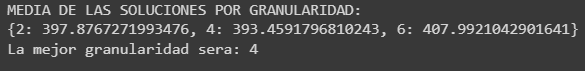

In [41]:
#Consideramos solo las soluciones de granularidad mejor_gran

dict_sol_bl = {}

for semilla,dictgranu in dictsem.items():
  for granu,value in dictgranu.items():
    if granu == mejor_gran:
      dict_sol_bl[semilla] = value

print(dict_sol_bl)

costes = []
evaluaciones = []

for coste_ev in dict_sol_bl.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["BL Primer"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,tiempo_local]

print(df_results)

{1111: {'coste': 384.8470156925342, 'num_ev': 269}, 2222: {'coste': 392.0999701041871, 'num_ev': 258}, 3333: {'coste': 393.4619201703272, 'num_ev': 261}, 4444: {'coste': 405.3806154159595, 'num_ev': 266}, 5555: {'coste': 391.5063770221136, 'num_ev': 266}}
          Ev.Mejor Ev.Media   Ev.Desv   Kms.Mejor   Kms.Media   Kms.Desv  \
Greedy           1        1         -  574.551385  574.551385          -   
Aleatorio      100      100         0  439.129775  462.034987  11.935613   
BL Primer      258    264.0  3.949684  384.847016  393.459180   6.662596   

              tiempo  
Greedy      0.035314  
Aleatorio   4.478204  
BL Primer  11.138650  


#ENFRIAMIENTO SIMULADO



## Parámetros:

* **Mecanismo de enfriamiento:** Cauchy (Tk = T0/(1 + k)), siendo k número de iteracion actual

* **Condicion de enfriamiento L(T):**  Se enfriará la temperatura, y finalizará a la iteración actual, cuando se haya generado un **número máximo de vecinos** (independientemente de si han sido o no aceptados) *(Determinar este parámetro con la experimentación de al menos tres valores en el entorno de 20 vecinos.)*

* **Condicion de parada:**  El algoritmo finalizará cuando se alcance un número máximo de iteraciones (enfriamientos). *Determinar este parámetro con la experimentación de al menos tres valores en el entorno de 80 iteraciones.*

Se calculará la temperatura inicial (T0) en función de la siguiente fórmula:

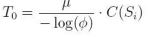

donde C(Si) es el costo de la solución inicial y Φ[0,1] (fi) es la
probabilidad de aceptar una solución un µ (mu) por 1 peor que la inicial.

En las ejecuciones se
considerar Φ,µ, entre 0.1 y 0.3 mediante una pequeña experimentación que determine el que el
número de soluciones iniciales no aceptadas sea de un 20% para T0, tomando C(s) como el coste
de la solución Greedy.

## CORRECION

Tener en cuenta cual de las iteraciones ha sido mas robusta (menor desviacion tipica) a la hora de de asignar valores a L y num_iter

In [ ]:
#Calculamos los valores de mu y fi

mu = 0.1

fi = 0.1



#Calculamos los valores de mu y fi
for mu_test in range(10,31,1):
  mu_test = mu_test/100
  print("mu_test:",mu_test)
  for fi_test in range(10,31,1):
    cont_aceptadas = 0
    fi_test = fi_test/100
    print("fi_test:",fi_test)

    for i in range (100):
      t_greedy = mu_test * result_greedy / - (math.log(fi_test))
      sol_aleatoria = func_evaluacion(crea_estaciones_random().copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
      t_aleatoria = mu_test * sol_aleatoria / - (math.log(fi_test))

      if t_aleatoria < t_greedy:
        #print("Entro aqui")
        cont_aceptadas += 1
    print("Acepto",cont_aceptadas)
    if cont_aceptadas <= 20:
      mu = mu_test
      fi = fi_test

print("mu:",mu," fi:",fi)
    


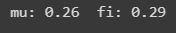

In [42]:
mu = 0.26
fi = 0.29

In [43]:
#Definimos el resto de parametros

max_iters = [40,80,120]

granularidad = 4

Ls = [10,20,30]

t0 = mu * result_greedy / - (math.log(fi))




##Código

(se pueden añadir capturas del pseudocodigo que se ha seguido)

In [ ]:
#Comprobaremos que valor es el mejor de los parametros L y max_iter

dictiter_l = {}
for max_iter in max_iters:
  for L in Ls:

    dictiter_l[str(max_iter)+str(L)] = []


for semilla in semillas:
  #Generamos una primera solucion aleatoria
  random.seed(semilla)

  for max_iter in max_iters:
    tfin = t0 / (1 + max_iter)
    for L in Ls:

      print("semilla",semilla," con max_iter", max_iter,"y L",L)

      cont_evs = 0

      sol_act = crea_estaciones_random()
      coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
      cont_evs += 1
      
      #Lista de posibles movimientos (permutaciones)
      movimientos = permutations(range(16),2)
      movimientos = list(movimientos)
      random.shuffle(movimientos)
      
      t = t0
      k = 0


      while t >= tfin:

        for i in range(L): #Realiza L iteraciones
          
          sol_candidata = get_vecino(sol_act,movimientos,granularidad)
          coste_sol_cand = func_evaluacion(sol_candidata.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
          cont_evs += 1

          dif_coste = coste_sol_cand - coste_act

          if random.random() < math.exp((- dif_coste) / t) or dif_coste < 0:
            sol_act = sol_candidata
            coste_act = coste_sol_cand
            
            movimientos = permutations(range(16),2)
            movimientos = list(movimientos)
            random.shuffle(movimientos)

        t = t0 / (1 + k) #Enfriamiento cauchy
        k += 1

      print("key",str(max_iter)+str(L) ,"coste actual:",coste_act)
      
      dictiter_l[str(max_iter)+str(L)].append(coste_act)


#Una vez tenemos todos los valores guardados, calculamos cuales dan menor 
#desviacion tipica, es decir, hacen que el alg sea mas robusto

mejor_desv = sys.maxsize

for key,value in dictiter_l.items():
  if np.std(value) < mejor_desv:
    mejor_desv = np.std(value)
    mejor_combi = key

mejor_iter = mejor_combi[:2]
L = mejor_combi[2:]

print("Mejor desv",mejor_desv," con max_iter",mejor_iter," y L",L)

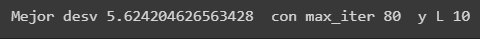

In [45]:
#Evaluamos los valores de los parametros en la mejor solucion

ini_es = time.time()

max_iter = 80
L = 10
tfin = t0 / (1 + max_iter)

dict_sem = {}
dictcost_ev = {}

for semilla in semillas:
  #Generamos una primera solucion aleatoria
  random.seed(semilla)

  cont_evs = 0

  sol_act = crea_estaciones_random()
  coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
  cont_evs += 1
  
  #Lista de posibles movimientos (permutaciones)
  movimientos = permutations(range(16),2)
  movimientos = list(movimientos)
  random.shuffle(movimientos)
  
  t = t0
  k = 0

  while t >= tfin:

    for i in range(L): #Realiza L iteraciones
      
      sol_candidata = get_vecino(sol_act,movimientos,granularidad)
      coste_sol_cand = func_evaluacion(sol_candidata.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
      cont_evs += 1

      dif_coste = coste_sol_cand - coste_act

      if random.random() < math.exp((- dif_coste) / t) or dif_coste < 0:
        sol_act = sol_candidata
        coste_act = coste_sol_cand
        
        movimientos = permutations(range(16),2)
        movimientos = list(movimientos)
        random.shuffle(movimientos)

    t = t0 / (1 + k) #Enfriamiento cauchy
    k += 1

  dictcost_ev["coste"] = coste_act
  dictcost_ev["num_ev"] = cont_evs

  dictsem[semilla] = dictcost_ev.copy()

fin_es = time.time()

tiempo_es = fin_es - ini_es

print(dictsem)

{1111: {'coste': 392.7814239220539, 'num_ev': 821}, 2222: {'coste': 422.3234224483979, 'num_ev': 821}, 3333: {'coste': 396.6234680624605, 'num_ev': 821}, 4444: {'coste': 427.06461662404087, 'num_ev': 821}, 5555: {'coste': 417.93212345434006, 'num_ev': 821}}


In [46]:
#CALCULAMOS LOS VALORES ESTADISTICOS Y GUARDAMOS EN EL DF

costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["Enf. Simulado"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,tiempo_es]

print(df_results)

              Ev.Mejor Ev.Media   Ev.Desv   Kms.Mejor   Kms.Media   Kms.Desv  \
Greedy               1        1         -  574.551385  574.551385          -   
Aleatorio          100      100         0  439.129775  462.034987  11.935613   
BL Primer          258    264.0  3.949684  384.847016  393.459180   6.662596   
Enf. Simulado    821.0    821.0       0.0  392.781424  411.345011  13.945266   

                  tiempo  
Greedy          0.035314  
Aleatorio       4.478204  
BL Primer      11.138650  
Enf. Simulado  38.124986  


# BÚSQUEDA TABU

Los 40 vecinos son aleatorios, da igual si se repiten o no.

martiz de probabilidades:

filas 1-8 (agrupar probabilidad de 10 en 10 numeros p.ej.)

columnas 1-16

Tener en cuenta el caso de 0.999... de prob.


do-while con condicion de parada numero de iteraciones


do
  vecinos = generavec()
  Mvecino = calccoste(vecinos)
  coste(Mvecino) < coste (sol)
    sol = Mvecino
  SA = Mvecino 
  actualizar_frec
  actualizar_tabu

  cada 4 veces... (if)
    reinicializar

  aumentar o disminuir tabu
  

while iteraciones

##Dudas

* 40 vecinos?

* tenure SOL -> tamaño de la lista tabu

* tamaño de la matriz de frecuencia (220??)

* Granularidad ??

## Apuntes

* En la matriz de frecuencia restar el tamaño maximo de slots posibles cada vez que le damos un numero de slots a cada estacion (220 - 25) , (220 - 25 - 15)... O normalizar como dice Fragio


##Parametros

* **Estrategia de selección de vecino:**  Consistirá en examinar 40 vecinos para coger el mejor de acuerdo a los criterios tabú

* **Codificación tabú:** codificación de valores en cada estación. Cuantas veces toma un valor una estación.

* **Selección de estrategias de reinicialización:** La probabilidad de escoger la reinicialización construyendo una solución inicial aleatoria es 0,25, la de usar la memoria a largo plazo al generar una nueva solución greedy es 0,5, y la de utilizar la reinicialización desde la mejor solución obtenida es 0,25.

* **La solución greedy debe generar soluciones con mayor probabilidad para los valores que
menos veces se han producido en cada estación:**
Para cada estación se deberá calcular las inversas de los valores acumulados y luego
normalizar para tener valores entre 0-1 correspondiente a su probabilidad. Se tirará un
dado y se elige el primer valor que supera dicho valor añadiéndose a la solución greedy

In [47]:
granularidad = 4

num_vec = 40

numtot_iter = 200

numiter_reinicio = int(numtot_iter/4)

reinicios = 4

#Estacion,num_max_bicis (0-15, 0-9) (agruparemos la frecuencia de 4 en 4 hasta llegar a 40 )
max_bicis_est = 40
rango_bicis_agrup = round(max_bicis_est/10)


lista_tabu_pos = 0

tenencia_tabu = 4

##Código

In [54]:
#Lista Tabu de movimientos (origen,destino)

ini_tabu = time.time()

dictsem = {}
dictcost_ev = {}

dictsol = {}

for sem in semillas:
  dictsol[sem] = sys.maxsize

for semilla in semillas:
  random.seed(semilla)
  print("SEMILLA",semilla)

  cont_evs = 0

  #Inicializamos aqui la matriz de frecuencia y la lista tabu
  matriz_frec = np.ones((16,round(max_bicis_est/rango_bicis_agrup))) #Memoria a largo plazo

  lista_tabu = [] #Memoria a corto plazo

  sol_act = crea_estaciones_random()
  coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
  cont_evs += 1
  #Actualizamos la matriz de frecuencias

  matriz_frec = actualiza_matriz_frec(matriz_frec,sol_act,rango_bicis_agrup)

  #Inicializamos la mejor solucion y mejor coste

  mejor_sol = sol_act
  mejor_coste = coste_act

  
  #Realizaremos un reinicio cada Numtotal-iteraciones/4.
  cont_iter = 0

  for iter in range(numtot_iter):

    print("iteracion numero:",iter," con mejor coste:",mejor_coste," y coste act:",coste_act)

    cont_iter += 1

    #Seguimos iterando
    if cont_iter != numiter_reinicio:
      
      #Examinamos 40 vecinos
      candidatos = []

      #Lista de posibles movimientos (permutaciones)
      movimientos = permutations(range(16),2)
      movimientos = list(movimientos)
      random.shuffle(movimientos)

      for i in range(num_vec):
        vecino, mov = get_vecino_tabu(sol_act,movimientos,granularidad)
        coste = func_evaluacion(vecino.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
        cont_evs +=1
        es_tabu = mov in lista_tabu

        candidatos.append([vecino,mov,coste,es_tabu])

      #Ordenamos por coste a los candidatos
      candidatos.sort(key = lambda x:x[2]) #Se puede hacer sin el lambda (de menor a mayor)
      mejor_candidato = candidatos[0]
      #print("sol act:",sol_act,"Mejor candidato:",mejor_candidato)

      #Si mejoramos la solucion global (criterio de aspiracion, menor coste):
      #print("mejor coste:",mejor_coste,"coste del mejor candidato:",mejor_candidato[2])
      if mejor_coste > mejor_candidato[2]:
       
        sol_act = mejor_candidato[0]
        coste_act = mejor_candidato[2]
        mov_act = mejor_candidato[1]

        mejor_sol = sol_act
        mejor_coste = coste_act

        #Actualizamos la lista tabu

        #Si el mov. es tabu activo pero mejora la solucion, ya esta en la lista tabu, no actualizamos
        if mejor_candidato[3] != True:
          lista_tabu,lista_tabu_pos = actualiza_tabu(mov_act,lista_tabu,lista_tabu_pos,tenencia_tabu)

      else:

        cand_sin_tabu = []
        #Eliminamos los movimientos tabu de la lista de candidatos
        for cand in candidatos:
          #NO es tabu
          if cand[3] != True:
            cand_sin_tabu.append(cand)

        nuevo_candidato = cand_sin_tabu[0]

        sol_act = nuevo_candidato[0]
        coste_act = nuevo_candidato[2]
        mov_act = nuevo_candidato[1]

        #Actualizamos la lista tabu
        lista_tabu,lista_tabu_pos = actualiza_tabu(mov_act,lista_tabu,lista_tabu_pos,tenencia_tabu)


      #Actualizamos la matriz de frecuencia
      matriz_frec = actualiza_matriz_frec(matriz_frec,sol_act,rango_bicis_agrup)


    #Realizamos una reinicializacion
    else:
      print("\n\n***REINICIALIZAMOS***\n\n")
      #Reiniciamos la memoria a corto plazo
      cont_iter = 0
      lista_tabu = []
      lista_tabu_pos = 0

      #Variamos el tamño de la lista tabu
      if random.random() < 0.5:
        tenencia_tabu += tenencia_tabu / 2
      else:
        tenencia_tabu -= tenencia_tabu / 2

      tenencia_tabu = int(tenencia_tabu)
      #La lista tabu no puede ser < 2
      if tenencia_tabu < 2:
        tenencia_tabu = 2

      prob = random.random()
      print("Probabilidad:",prob)

      if prob <= 0.25:
        #Solucion aleatoria (diversificamos)
        print("opcion 1")
        sol_act = crea_estaciones_random()
        coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
        cont_evs += 1

      elif prob <= 0.5:
        #Volvemos a la mejor solucion generada (intensificamos)
        print("opcion 2")
        sol_act = mejor_sol.copy()
        coste_act = mejor_coste.copy()
      else:
        #Sol. Greedy (diversificacion controlada)
        print("opcion 3")
        sol_act = crea_greedy_prob(matriz_frec.copy(),rango_bicis_agrup)
        coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
        cont_evs += 1

  dictcost_ev["coste"] = mejor_coste
  dictcost_ev["num_ev"] = cont_evs
  dictcost_ev["estaciones"] = mejor_sol

  dictsem[semilla] = dictcost_ev.copy()

fin_tabu = time.time()

tiempo_tabu = fin_tabu - ini_tabu

print(dictsem)

SEMILLA 1111
iteracion numero: 0  con mejor coste: 599.2192477684586  y coste act: 599.2192477684586
iteracion numero: 1  con mejor coste: 571.9524509228156  y coste act: 571.9524509228156
iteracion numero: 2  con mejor coste: 546.5899909092169  y coste act: 546.5899909092169
iteracion numero: 3  con mejor coste: 513.5916821733485  y coste act: 513.5916821733485
iteracion numero: 4  con mejor coste: 493.1552671038036  y coste act: 493.1552671038036
iteracion numero: 5  con mejor coste: 471.04263375240095  y coste act: 471.04263375240095
iteracion numero: 6  con mejor coste: 453.53319690574597  y coste act: 453.53319690574597
iteracion numero: 7  con mejor coste: 443.66762138336213  y coste act: 443.66762138336213
iteracion numero: 8  con mejor coste: 435.0243119400382  y coste act: 435.0243119400382
iteracion numero: 9  con mejor coste: 427.7521125691313  y coste act: 427.7521125691313
iteracion numero: 10  con mejor coste: 418.8484049677057  y coste act: 418.8484049677057
iteracion nu

In [55]:
#Guardo en el dafaframe

costes = []
evaluaciones = []
estaciones = {}

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])
  estaciones[coste_ev["coste"]] = coste_ev["estaciones"]

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

mejor_est = estaciones[mejor_coste]

df_results.loc["Tabu_movs"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,tiempo_tabu]

print("mejor distribucion de estaciones:",mejor_est)

print(df_results)

mejor distribucion de estaciones: [19. 13. 21. 26. 19. 12.  8. 10. 13. 15. 15. 23.  2.  7.  6. 13.]
              Ev.Mejor Ev.Media   Ev.Desv   Kms.Mejor   Kms.Media   Kms.Desv  \
Greedy               1        1         -  574.551385  574.551385          -   
Aleatorio          100      100         0  439.129775  462.034987  11.935613   
BL Primer          258    264.0  3.949684  384.847016  393.459180   6.662596   
Enf. Simulado    821.0    821.0       0.0  392.781424  411.345011  13.945266   
Tabu_movs         7842   7844.0  1.095445  363.306881  370.667151   8.717799   
Tabu_elem_mov   7842.0   7844.0  1.095445  353.829296  367.958312  10.471496   

                   tiempo  
Greedy           0.035314  
Aleatorio        4.478204  
BL Primer       11.138650  
Enf. Simulado   38.124986  
Tabu_movs      418.117375  
Tabu_elem_mov  339.982592  


In [50]:
granularidad = 4

num_vec = 40

numtot_iter = 200

numiter_reinicio = int(numtot_iter/4)

reinicios = 4

#Estacion,num_max_bicis (0-15, 0-9) (agruparemos la frecuencia de 4 en 4 hasta llegar a 40 )
max_bicis_est = 40
rango_bicis_agrup = round(max_bicis_est/10)


lista_tabu_pos = 0

tenencia_tabu = 4

In [ ]:
#Lista Tabu de soluciones  (elem1,elem2,origen,destino)

dictsem = {}
dictcost_ev = {}
ini_tabu = time.time()

for semilla in semillas:
  random.seed(semilla)
  print("SEMILLA",semilla)

  cont_evs = 0

  #Inicializamos aqui la matriz de frecuencia y la lista tabu
  matriz_frec = np.ones((16,round(max_bicis_est/rango_bicis_agrup))) #Memoria a largo plazo

  lista_tabu = [] #Memoria a corto plazo

  sol_act = crea_estaciones_random()
  coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
  cont_evs += 1
  #Actualizamos la matriz de frecuencias

  matriz_frec = actualiza_matriz_frec(matriz_frec,sol_act,rango_bicis_agrup)

  #Inicializamos la mejor solucion y mejor coste

  mejor_sol = sol_act
  mejor_coste = coste_act

  
  #Realizaremos un reinicio cada Numtotal-iteraciones/4.
  cont_iter = 0

  for iter in range(numtot_iter):

    print("iteracion numero:",iter," con mejor coste:",mejor_coste," y coste actual:",coste_act)

    cont_iter += 1

    #Seguimos iterando
    if cont_iter != numiter_reinicio:
      
      #Examinamos 40 vecinos
      candidatos = []

      #Lista de posibles movimientos (permutaciones)
      movimientos = permutations(range(16),2)
      movimientos = list(movimientos)
      random.shuffle(movimientos)

      for i in range(num_vec):
        vecino, mov = get_vecino_tabu(sol_act,movimientos,granularidad)
        coste = func_evaluacion(vecino.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy()) 
        cont_evs += 1
        es_tabu = (vecino[mov[0]],vecino[mov[1]],mov) in lista_tabu

        candidatos.append([vecino,mov,coste,es_tabu])

      #Ordenamos por coste a los candidatos
      candidatos.sort(key = lambda x:x[2]) #Se puede hacer sin el lambda (de menor a mayor)
      mejor_candidato = candidatos[0]

      #Si mejoramos la solucion global (criterio de aspiracion, menor coste):
      #print("mejor coste:",mejor_coste,"coste del mejor candidato:",mejor_candidato[2])
      if mejor_coste > mejor_candidato[2]:

        sol_act = mejor_candidato[0]
        coste_act = mejor_candidato[2]
        mov_act = mejor_candidato[1]
        elem_orig = sol_act[mov_act[0]]
        elem_dest = sol_act[mov_act[1]]

        mejor_sol = sol_act
        mejor_coste = coste_act

        #Actualizamos la lista tabu

        #Si el mov. es tabu activo pero mejora la solucion, ya esta en la lista tabu, no actualizamos
        if mejor_candidato[3] != True:
          lista_tabu,lista_tabu_pos = actualiza_tabu_elem_mov((elem_orig,elem_dest,mov_act),lista_tabu,lista_tabu_pos,tenencia_tabu)

      else:

        cand_sin_tabu = []
        #Eliminamos los movimientos tabu de la lista de candidatos
        for cand in candidatos:
          #NO es tabu
          if cand[3] != True:
            cand_sin_tabu.append(cand)

        nuevo_candidato = cand_sin_tabu[0]

        sol_act = nuevo_candidato[0]
        coste_act = nuevo_candidato[2]
        mov_act = nuevo_candidato[1]
        elem_orig = sol_act[mov_act[0]]
        elem_dest = sol_act[mov_act[1]]

        #Actualizamos la lista tabu
        lista_tabu,lista_tabu_pos = actualiza_tabu_elem_mov((elem_orig,elem_dest,mov_act),lista_tabu,lista_tabu_pos,tenencia_tabu)


      #Actualizamos la matriz de frecuencia
      matriz_frec = actualiza_matriz_frec(matriz_frec,sol_act,rango_bicis_agrup)


    #Realizamos una reinicializacion
    else:
      print("\n\n***REINICIALIZAMOS***\n\n")
      #Reiniciamos la memoria a corto plazo
      cont_iter = 0
      lista_tabu = []
      lista_tabu_pos = 0

      #Variamos el tamño de la lista tabu
      if random.random() < 0.5:
        tenencia_tabu += tenencia_tabu / 2
      else:
        tenencia_tabu -= tenencia_tabu / 2

      tenencia_tabu = int(tenencia_tabu)
      #La lista tabu no puede ser < 2
      if tenencia_tabu < 2:
        tenencia_tabu = 2

      prob = random.random()
      print("Probabilidad:",prob)

      if prob <= 0.25:
        #Solucion aleatoria (diversificamos)
        print("opcion 1")
        sol_act = crea_estaciones_random()
        coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
        cont_evs += 1

      elif prob <= 0.5:
        #Volvemos a la mejor solucion generada (intensificamos)
        print("opcion 2")
        sol_act = mejor_sol.copy()
        coste_act = mejor_coste.copy()
      else:
        #Sol. Greedy (diversificacion controlada)
        print("opcion 3")
        sol_act = crea_greedy_prob(matriz_frec.copy(),rango_bicis_agrup)
        coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
        cont_evs += 1

  dictcost_ev["coste"] = mejor_coste
  dictcost_ev["num_ev"] = cont_evs

  dictsem[semilla] = dictcost_ev.copy()

fin_tabu = time.time()

tiempo_tabu = fin_tabu - ini_tabu
print(dictsem)

In [52]:
#Guardo en el dafaframe

costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["Tabu_elem_mov"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,tiempo_tabu]

print(df_results)

              Ev.Mejor Ev.Media   Ev.Desv   Kms.Mejor   Kms.Media   Kms.Desv  \
Greedy               1        1         -  574.551385  574.551385          -   
Aleatorio          100      100         0  439.129775  462.034987  11.935613   
BL Primer          258    264.0  3.949684  384.847016  393.459180   6.662596   
Enf. Simulado    821.0    821.0       0.0  392.781424  411.345011  13.945266   
Tabu_movs       7842.0   7844.0  1.095445  351.875327  364.056722  12.026306   
Tabu_elem_mov   7842.0   7844.0  1.095445  353.829296  367.958312  10.471496   

                   tiempo  
Greedy           0.035314  
Aleatorio        4.478204  
BL Primer       11.138650  
Enf. Simulado   38.124986  
Tabu_movs      368.200993  
Tabu_elem_mov  339.982592  


#Exportacion de los resultados a un .csv

In [53]:
df_results.to_csv("dataframe_v2.csv", decimal='.', float_format='%.3f')

# Colocamos en un mapa las coordenadas de las estaciones con el mejor resultado

In [73]:
#Leemos el dataframe de coordenadas
positions = './bicicletas/positions.csv'

df_positions = pd.read_csv(positions,delimiter = ";")

print(df_positions)

latitudes = df_positions["lat"]
latitudes = list(latitudes)

longitudes = df_positions["lng"]
longitudes = list(longitudes)

num = df_positions["num"]
nums = list(num)

          lat       lng  num
0   43.471805 -3.781346    8
1   43.475732 -3.798064    3
2   43.458384 -3.810468   14
3   43.457966 -3.824801   12
4   43.469149 -3.773276    9
5   43.470166 -3.806499    7
6   43.471966 -3.792854    5
7   43.474413 -3.785781    2
8   43.463552 -3.788005   10
9   43.460726 -3.817978   13
10  43.478472 -3.788653    4
11  43.461719 -3.802100    1
12  43.471106 -3.800586    6
13  43.452813 -3.871391   16
14  43.454826 -3.866901   17
15  43.462143 -3.797241   11


image.png

In [70]:
!pip install geocoder

     |████████████████████████████████| 98 kB 6.9 MB/s 


In [77]:
import geocoder
import json

mejor_sol = [19,13,21,26,19,12,8,10,13,15,15,23,2,7,6,13]
sol_ini = list(df_deltas.iloc[0,:])

geojson = {
    'type': 'FeatureCollection',
    'features': []
}
report_noloc = ''
results = 0
total = 0



for i in range(16):
    total += 1

    print('estacion {}, id {}, con lat {}, long {} y numero de bicicletas {}'.format(
        i,nums[i],latitudes[i],longitudes[i],mejor_sol[i]))
    geojson['features'].append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [longitudes[i], latitudes[i]],
        },
        "properties": {
            "id": nums[i],
            "pos_dataframe":i,
            "sol_ini":sol_ini[i],
            "sol_final": mejor_sol[i],
        }
    })

with open('geo_results.geojson', 'w') as geofile:
    geofile.write(json.dumps(geojson, indent=2))


estacion 0, id 8, con lat 43.47180483, long -3.781346135 y numero de bicicletas 19
estacion 1, id 3, con lat 43.47573226, long -3.798063871 y numero de bicicletas 13
estacion 2, id 14, con lat 43.45838389, long -3.810468391 y numero de bicicletas 21
estacion 3, id 12, con lat 43.45796625, long -3.824801242 y numero de bicicletas 26
estacion 4, id 9, con lat 43.46914941, long -3.773275976 y numero de bicicletas 19
estacion 5, id 7, con lat 43.47016611, long -3.806499478 y numero de bicicletas 12
estacion 6, id 5, con lat 43.47196611, long -3.792854496 y numero de bicicletas 8
estacion 7, id 2, con lat 43.47441267, long -3.785781345 y numero de bicicletas 10
estacion 8, id 10, con lat 43.46355212, long -3.788005479 y numero de bicicletas 13
estacion 9, id 13, con lat 43.46072554, long -3.817978245 y numero de bicicletas 15
estacion 10, id 4, con lat 43.47847181, long -3.788653146 y numero de bicicletas 15
estacion 11, id 1, con lat 43.461719, long -3.8021 y numero de bicicletas 23
estaci